In [2]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
import matplotlib.animation as animation

In [3]:
plant_df = pd.read_csv('../dataFunctions/final_data/plant/image_df_1.csv', sep = ';')
animal_df = pd.read_csv('../dataFunctions/final_data/animal/image_df_1.csv', sep = ';')
human_df = pd.read_csv('../dataFunctions/final_data/human/image_df_1.csv', sep = ';')

In [4]:
plant_df.head(5)

Unnamed: 0            picID  img_feature_1  img_feature_2  img_feature_3  \
0           0  plant_id_124470       1.522266       0.000000       0.000000   
1           1  plant_id_155289       1.811741       0.000000       0.150782   
2           2   plant_id_74720       2.275812       0.000000       0.340468   
3           3  plant_id_201106       3.907907       0.065622       0.018940   
4           4  plant_id_162425       1.831769       0.000000       0.000000   

   img_feature_4  img_feature_5  img_feature_6  img_feature_7  img_feature_8  \
0       0.000000            0.0       0.031445            0.0       0.998306   
1       0.000000            0.0       0.321047            0.0       0.000000   
2       0.000000            0.0       0.035155            0.0       0.118706   
3       0.038919            0.0       0.000000            0.0       0.838007   
4       0.000000            0.0       0.064360            0.0       0.139151   

   ...  img_feature_504  img_feature_505  img_feature_506  img_feature_507  \
0  ...         0.000000         2.549896         0.000000              0.0   
1  ...         0.000000         1.207927         0.000000              0.0   
2  ...         0.104279         0.505712         0.004516              0.0   
3  ...         0.000000         1.118266         0.096990              0.0   
4  ...         0.000000         0.470557         0.457551              0.0   

   img_feature_508  img_feature_509  img_feature_510  img_feature_511  \
0         0.000000              0.0         0.127631         4.608596   
1         0.000000              0.0         2.291044         3.895061   
2         0.253630              0.0         2.912644         4.512370   
3         0.000000              0.0         0.577528         3.476989   
4         0.085066              0.0         3.276525         1.448648   

   img_feature_512  category_label  
0         0.208546               0  
1         0.091792               0  
2         0.000000               0  
3         1.042560               0  
4         1.067148               0  

[5 rows x 515 columns]

In [5]:
animal_df.head(5)

Unnamed: 0             picID  img_feature_1  img_feature_2  img_feature_3  \
0           0    animal_id_2702       3.617623       0.000000       0.000000   
1           1  animal_id_229726       3.357070       0.018038       0.236933   
2           2   animal_id_30917       4.352070       0.119265       0.000000   
3           3  animal_id_344284       3.443075       0.000000       0.000000   
4           4  animal_id_217810       4.657082       0.090311       0.000000   

   img_feature_4  img_feature_5  img_feature_6  img_feature_7  img_feature_8  \
0       0.000000       0.017707       0.000000            0.0       0.035830   
1       0.065175       0.000000       0.070303            0.0       0.035530   
2       0.020391       0.000000       0.000000            0.0       1.900328   
3       0.080347       0.000000       0.586434            0.0       0.799193   
4       0.201625       0.000000       0.000000            0.0       0.313209   

   ...  img_feature_504  img_feature_505  img_feature_506  img_feature_507  \
0  ...         0.000000         1.525273         0.055354              0.0   
1  ...         0.184254         3.149944         0.005712              0.0   
2  ...         0.000000         0.367555         0.009528              0.0   
3  ...         0.000000         1.989263         0.000000              0.0   
4  ...         0.042945         3.213472         0.000000              0.0   

   img_feature_508  img_feature_509  img_feature_510  img_feature_511  \
0         0.000000              0.0         1.355609         4.947271   
1         0.760246              0.0         0.341614         4.916250   
2         0.000000              0.0         0.318800         3.894835   
3         0.005292              0.0         0.780532         4.800859   
4         0.000000              0.0         0.814003         5.462814   

   img_feature_512  category_label  
0         0.000000               1  
1         0.000000               1  
2         0.510874               1  
3         1.590539               1  
4         0.598871               1  

[5 rows x 515 columns]

In [6]:
human_df.head(5)

Unnamed: 0            picID  img_feature_1  img_feature_2  img_feature_3  \
0           0  human_id_165033       3.743257       0.000000       0.013113   
1           1  human_id_294072       3.352795       0.053887       0.000000   
2           2   human_id_94314       1.321456       0.000000       0.864295   
3           3  human_id_302004       2.570040       0.000000       0.042885   
4           4  human_id_240545       2.106082       0.000000       0.094384   

   img_feature_4  img_feature_5  img_feature_6  img_feature_7  img_feature_8  \
0       0.024169       0.000000       0.049418            0.0       0.417764   
1       0.039352       0.000000       0.045831            0.0       0.240700   
2       0.559613       0.000000       0.159294            0.0       0.720615   
3       0.006583       0.000000       0.105672            0.0       0.409923   
4       0.066789       0.039359       0.015591            0.0       0.942039   

   ...  img_feature_504  img_feature_505  img_feature_506  img_feature_507  \
0  ...         0.000000         3.040104         0.225264              0.0   
1  ...         0.000000         2.789502         0.034314              0.0   
2  ...         0.000000         1.525789         0.000000              0.0   
3  ...         0.000000         1.577250         0.000000              0.0   
4  ...         0.693273         2.274692         0.001590              0.0   

   img_feature_508  img_feature_509  img_feature_510  img_feature_511  \
0         0.019927         0.000000         1.787778         2.941212   
1         0.000000         0.000000         1.435514         4.117087   
2         0.000000         0.000000         1.725762         4.534904   
3         0.101248         0.000000         1.204849         3.920662   
4         0.000000         0.072579         0.000000         5.722419   

   img_feature_512  category_label  
0         1.000292               2  
1         0.956431               2  
2         0.107584               2  
3         0.753503               2  
4         0.691134               2  

[5 rows x 515 columns]

In [7]:
group_df = pd.concat([plant_df, animal_df, human_df], axis = 0)
adjusted_group_df = group_df.drop(['Unnamed: 0'], axis = 1).drop(['picID'], axis = 1).drop(['category_label'], axis = 1)
y_embedded = group_df['category_label']

In [15]:
#X_embedded = TSNE(n_components=2).fit_transform(adjusted_group_df)
#pd.DataFrame(X_embedded).to_csv('./tSNE_sample_2d.csv', sep=';')
X_embedded = np.array(pd.read_csv('./tSNE_sample_2d.csv', sep = ';').drop(['Unnamed: 0'], axis = 1))

In [16]:
X_embedded

array([[ -5.4497824,  22.523678 ],
       [-28.197199 ,   6.4212713],
       [-18.511385 ,   5.7678246],
       ...,
       [  1.2779716,   6.9203167],
       [ 40.702503 ,  34.63201  ],
       [  2.662705 ,  34.575436 ]])

In [9]:
def get_category_from_embedding(value_check, X_embedded, y_embedded):
    x_embedded_new = []
    for idx, y_value in enumerate(y_embedded):
        if y_value == value_check:
            x_embedded_new.append(X_embedded[idx])
    return np.array(x_embedded_new)

x_embedded_plant = get_category_from_embedding(0, X_embedded, y_embedded)
x_embedded_animal = get_category_from_embedding(1, X_embedded, y_embedded)
x_embedded_human = get_category_from_embedding(2, X_embedded, y_embedded)

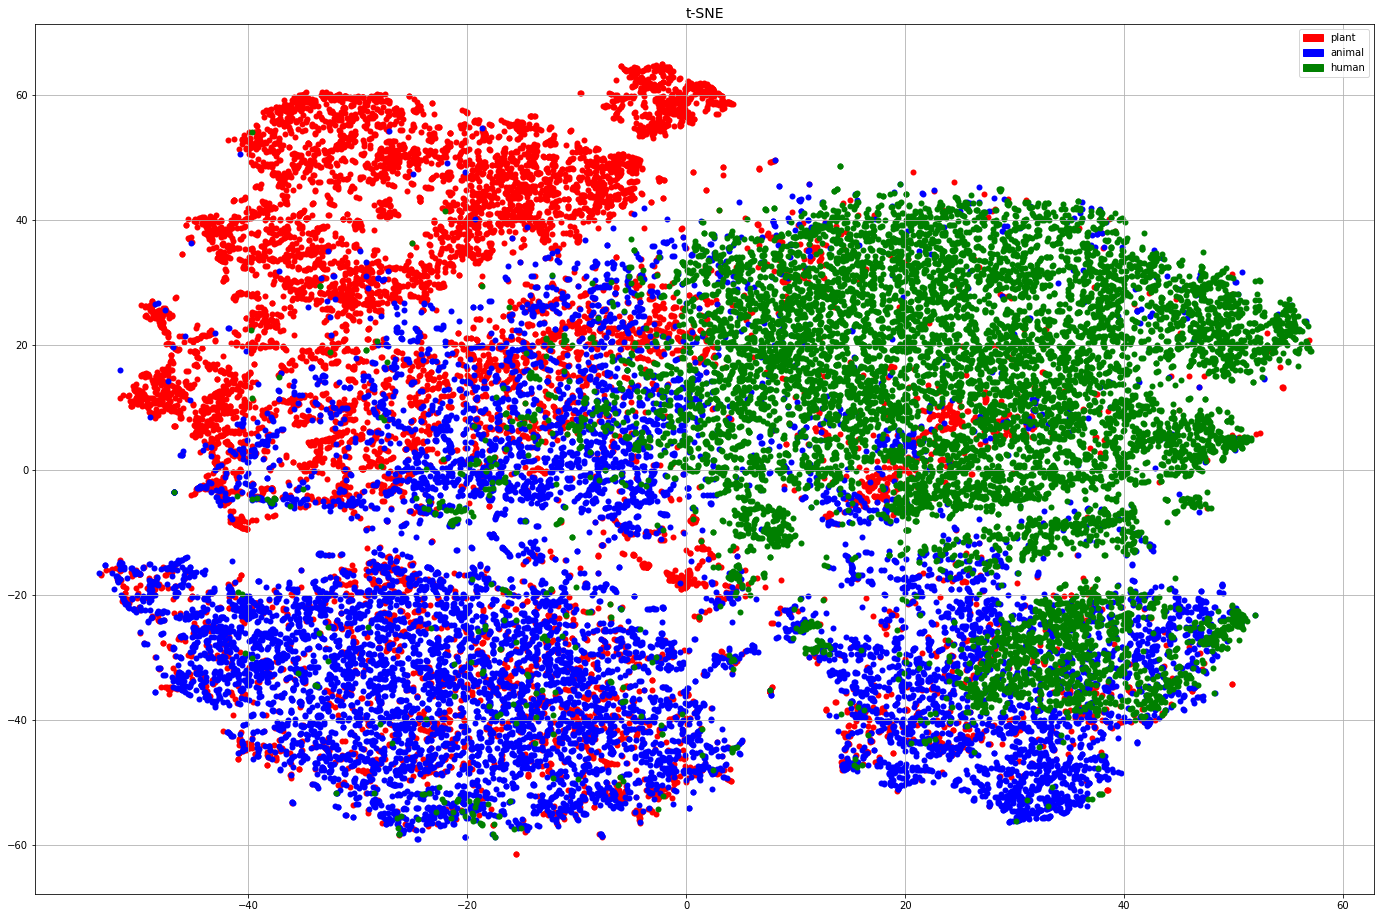

In [10]:
f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='red', label='plant')
red_patch = mpatches.Patch(color='blue', label='animal')
green_patch = mpatches.Patch(color='green', label='human')


ax.scatter(x_embedded_plant[:,0], x_embedded_plant[:,1], c= 'red', label='plant', linewidths=0.01)
ax.scatter(x_embedded_animal[:,0], x_embedded_animal[:,1], c= 'blue', label='animal', linewidths=0.01)
ax.scatter(x_embedded_human[:,0], x_embedded_human[:,1], c= 'green', label='human', linewidths=0.01)

ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch, green_patch])

In [11]:
#X_embedded_3d = TSNE(n_components=3).fit_transform(adjusted_group_df)
#pd.DataFrame(X_embedded_3d).to_csv('./tSNE_sample_3d.csv', sep = ';')
X_embedded_3d = np.array(pd.read_csv('./tSNE_sample_3d.csv', sep = ';').drop(['Unnamed: 0'], axis = 1))

In [12]:
x_embedded_plant = get_category_from_embedding(0, X_embedded_3d, y_embedded)
x_embedded_animal = get_category_from_embedding(1, X_embedded_3d, y_embedded)
x_embedded_human = get_category_from_embedding(2, X_embedded_3d, y_embedded)

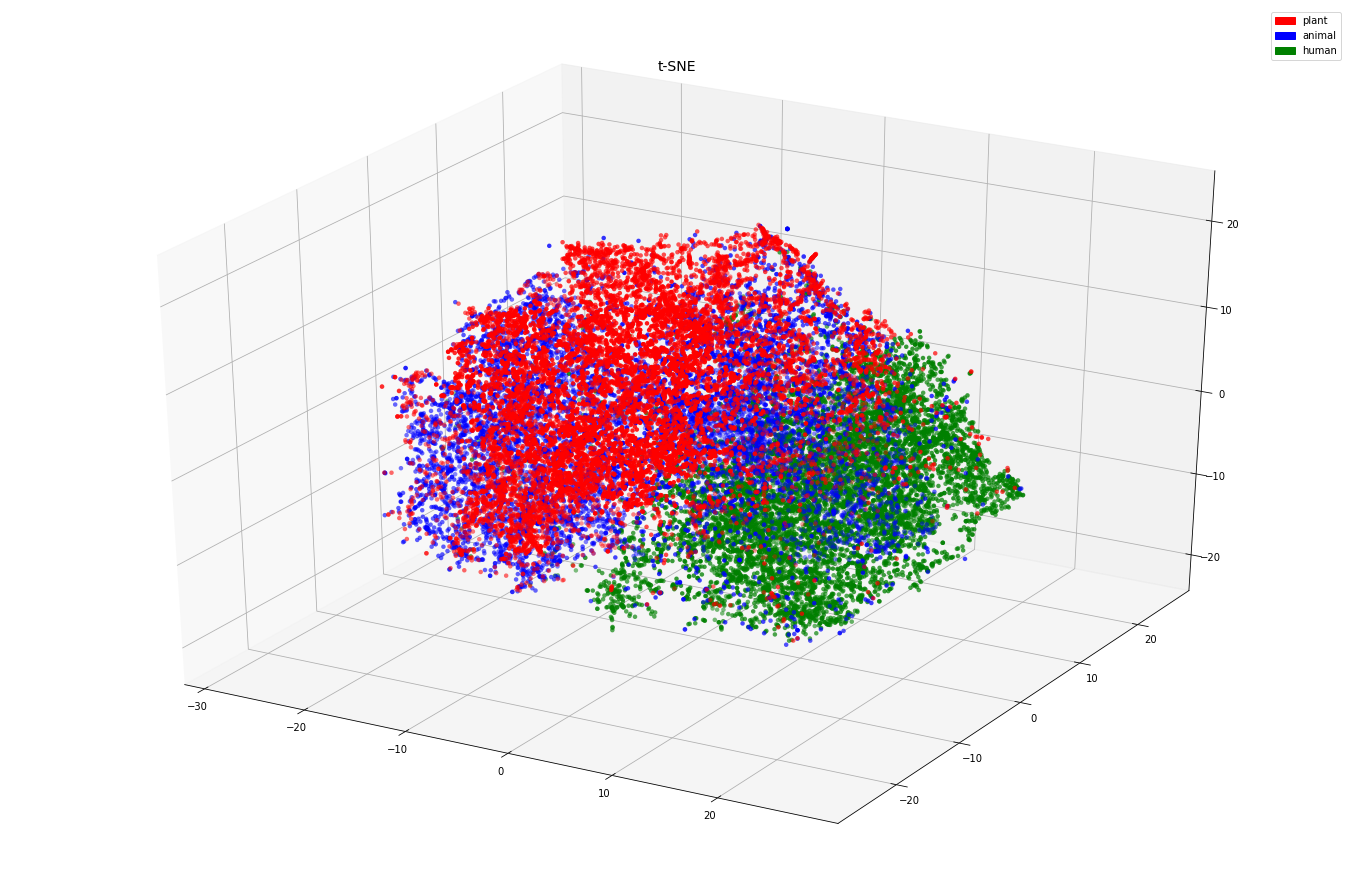

In [13]:
fig = plt.figure(figsize = (24,16))
ax = fig.add_subplot(111, projection='3d')

blue_patch = mpatches.Patch(color='red', label='plant')
red_patch = mpatches.Patch(color='blue', label='animal')
green_patch = mpatches.Patch(color='green', label='human')

ax.scatter(x_embedded_plant[:,0], x_embedded_plant[:,1], x_embedded_plant[:,2], c= 'red', label='plant', linewidths=0.01)
ax.scatter(x_embedded_animal[:,0], x_embedded_animal[:,1], x_embedded_animal[:,2], c= 'blue', label='animal', linewidths=0.01)
ax.scatter(x_embedded_human[:,0], x_embedded_human[:,1], x_embedded_human[:,2], c= 'green', label='human', linewidths=0.01)

ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch, green_patch])

In [14]:
#conda install -c conda-forge ffmpeg

## Separation Theory: 
There seems to be a subtle separation between the three categories. This suggests that t-SNE is able to slightly distinguish between the groups. 

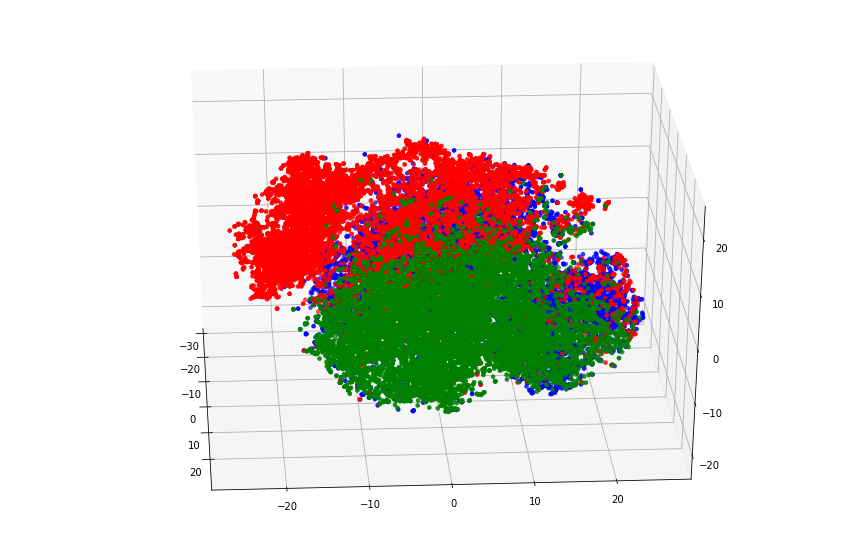

In [19]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
#ax.grid(False)
#ax.set_axis_off()

def init():
    ax.scatter(x_embedded_plant[:,0], x_embedded_plant[:,1], x_embedded_plant[:,2], c= 'red', label='plant', linewidths=0.01)
    ax.scatter(x_embedded_animal[:,0], x_embedded_animal[:,1], x_embedded_animal[:,2], c= 'blue', label='animal', linewidths=0.01)
    ax.scatter(x_embedded_human[:,0], x_embedded_human[:,1], x_embedded_human[:,2], c= 'green', label='human', linewidths=0.01)
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)    

HTML(ani.to_html5_video())